In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Datasets/Placement_pred_dataset.csv')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

In [ ]:
data.head(8)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status,salary
0,1,M,67.00,Others,91.00,Others,58.00,CSE,No,4,55.00,0,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,77.48,CSE,Yes,1,86.50,0,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,64.00,ECE/EN,No,2,75.00,1,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,52.00,CSE,No,0,66.00,2,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,73.30,ECE/EN,No,3,96.80,0,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,67.25,CSE,Yes,0,55.00,1,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,79.00,ECE/EN,No,0,74.28,1,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,66.00,CSE,Yes,1,67.00,0,Placed,252000.0


In [ ]:
data.shape

(215, 14)

In [ ]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
degree_p           0
Branch             0
Workex             0
Certifications     0
etest_p            0
Backlogs           0
status             0
salary            67
dtype: int64

In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,Certifications,etest_p,Backlogs,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,1.804651,72.100558,0.693023,288655.405405
std,62.209324,10.827205,10.897509,7.358743,1.643161,13.275956,0.716102,93457.452420
min,1.000000,40.890000,37.000000,50.000000,0.000000,50.000000,0.000000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,0.000000,60.000000,0.000000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,1.000000,71.000000,1.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,3.000000,83.500000,1.000000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,6.000000,98.000000,4.000000,940000.000000


In [ ]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p',
       'Branch', 'Workex', 'Certifications', 'etest_p', 'Backlogs', 'status',
       'salary'],
      dtype='object')

In [ ]:
data = data.drop(['sl_no','salary'],axis=1)

Text(0.5, 1.0, 'Employability Percentage')

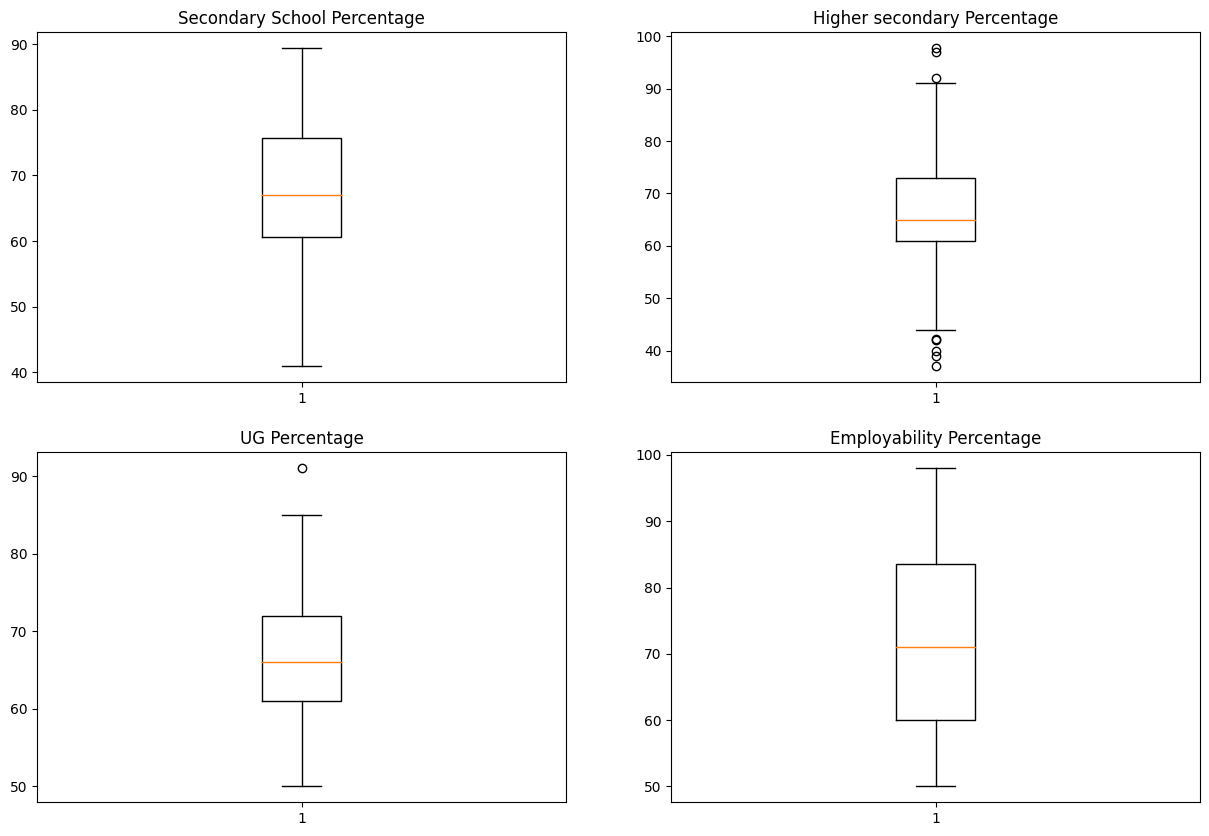

In [ ]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(data['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(data['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(data['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(data['etest_p'])
ax.set_title('Employability Percentage')


In [ ]:
Q1 = data['hsc_p'].quantile(0.25)
Q3 = data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (data['hsc_p'] >= Q1 - 1.5 * IQR) & (data['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= data.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x7c015845a140>,
 'caps': [<matplotlib.lines.Line2D at 0x7c015845a560>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0158459ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c015845aaa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c015845ad40>],
 'means': []}

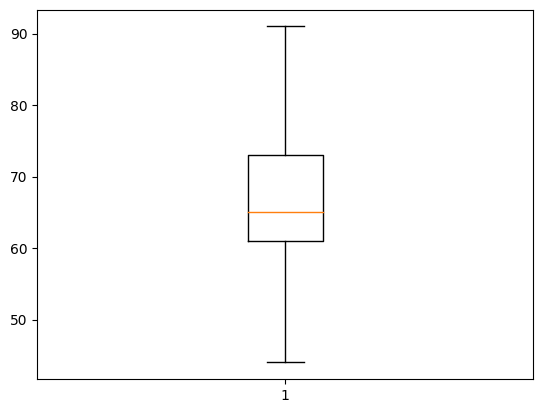

In [ ]:
plt.boxplot(placement_filtered['hsc_p'])

In [ ]:
print(data.dtypes)

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
degree_p          float64
Branch             object
Workex             object
Certifications      int64
etest_p           float64
Backlogs            int64
status             object
dtype: object


In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,M,67.00,Others,91.00,Others,58.00,CSE,No,4,55.0,0,Placed
1,M,79.33,Central,78.33,Others,77.48,CSE,Yes,1,86.5,0,Placed
2,M,65.00,Central,68.00,Central,64.00,ECE/EN,No,2,75.0,1,Placed
3,M,56.00,Central,52.00,Central,52.00,CSE,No,0,66.0,2,Not Placed
4,M,85.80,Central,73.60,Central,73.30,ECE/EN,No,3,96.8,0,Placed


In [ ]:
data['ssc_b'] = data['ssc_b'].map({'Central':1,'Others':0})
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,M,67.00,0,91.00,Others,58.00,CSE,No,4,55.0,0,Placed
1,M,79.33,1,78.33,Others,77.48,CSE,Yes,1,86.5,0,Placed


In [ ]:
data['hsc_b'] = data['hsc_b'].map({'Central':1,'Others':0})
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,M,67.00,0,91.00,0,58.00,CSE,No,4,55.0,0,Placed
1,M,79.33,1,78.33,0,77.48,CSE,Yes,1,86.5,0,Placed


In [ ]:
data['Branch'].unique()

array(['CSE', 'ECE/EN', 'Others'], dtype=object)

In [ ]:
data['Branch'] = data['Branch'].map({'ECE/EN':2,'CSE':1,'Others':0})
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,M,67.00,0,91.00,0,58.00,1,No,4,55.0,0,Placed
1,M,79.33,1,78.33,0,77.48,1,Yes,1,86.5,0,Placed


In [ ]:
data['Workex'] = data['Workex'].map({'Yes':1,'No':0})
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,M,67.00,0,91.00,0,58.00,1,0,4,55.0,0,Placed
1,M,79.33,1,78.33,0,77.48,1,1,1,86.5,0,Placed


In [ ]:
data['status'] = data['status'].map({'Placed':1,'Not Placed':0})
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,M,67.00,0,91.00,0,58.00,1,0,4,55.0,0,1
1,M,79.33,1,78.33,0,77.48,1,1,1,86.5,0,1
2,M,65.00,1,68.00,1,64.00,2,0,2,75.0,1,1
3,M,56.00,1,52.00,1,52.00,1,0,0,66.0,2,0
4,M,85.80,1,73.60,1,73.30,2,0,3,96.8,0,1


In [ ]:
data['gender'] = data['gender'].map({'M':0,'F':1})
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,0,67.00,0,91.00,0,58.00,1,0,4,55.0,0,1
1,0,79.33,1,78.33,0,77.48,1,1,1,86.5,0,1
2,0,65.00,1,68.00,1,64.00,2,0,2,75.0,1,1
3,0,56.00,1,52.00,1,52.00,1,0,0,66.0,2,0
4,0,85.80,1,73.60,1,73.30,2,0,3,96.8,0,1


In [ ]:
df = data
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,0,67.00,0,91.00,0,58.00,1,0,4,55.0,0,1
1,0,79.33,1,78.33,0,77.48,1,1,1,86.5,0,1
2,0,65.00,1,68.00,1,64.00,2,0,2,75.0,1,1
3,0,56.00,1,52.00,1,52.00,1,0,0,66.0,2,0
4,0,85.80,1,73.60,1,73.30,2,0,3,96.8,0,1


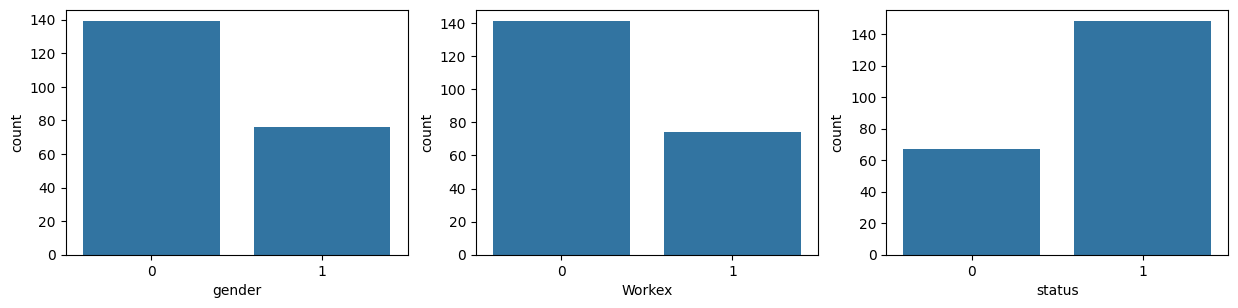

In [ ]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sb.countplot(x= 'gender' , data = data)

plt.subplot(232)
ax = sb.countplot(x= 'Workex' , data = data)

plt.subplot(233)
ax = sb.countplot(x= 'status' , data = data)

In [ ]:
X = data.drop('status',axis=1)
y= data['status']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [ ]:
print(data.corr())

                  gender     ssc_p     ssc_b     hsc_p     hsc_b  degree_p  \
gender          1.000000  0.068969  0.019429  0.021334  0.065945  0.173217   
ssc_p           0.068969  1.000000 -0.116194  0.511472 -0.066996  0.538404   
ssc_b           0.019429 -0.116194  1.000000  0.137013  0.605883 -0.038070   
hsc_p           0.021334  0.511472  0.137013  1.000000  0.019548  0.434206   
hsc_b           0.065945 -0.066996  0.605883  0.019548  1.000000 -0.067229   
degree_p        0.173217  0.538404 -0.038070  0.434206 -0.067229  1.000000   
Branch         -0.006157 -0.119835  0.075573  0.140902 -0.022222  0.042024   
Workex         -0.085153  0.175675  0.040744  0.141025 -0.038357  0.122648   
Certifications  0.099983  0.200043  0.032221  0.155375  0.037271  0.237945   
etest_p        -0.084294  0.261993  0.018991  0.245113 -0.039108  0.224470   
Backlogs       -0.036358 -0.247023 -0.018165 -0.162744 -0.056228 -0.207208   
status         -0.090670  0.607889 -0.037297  0.491228 -0.016945

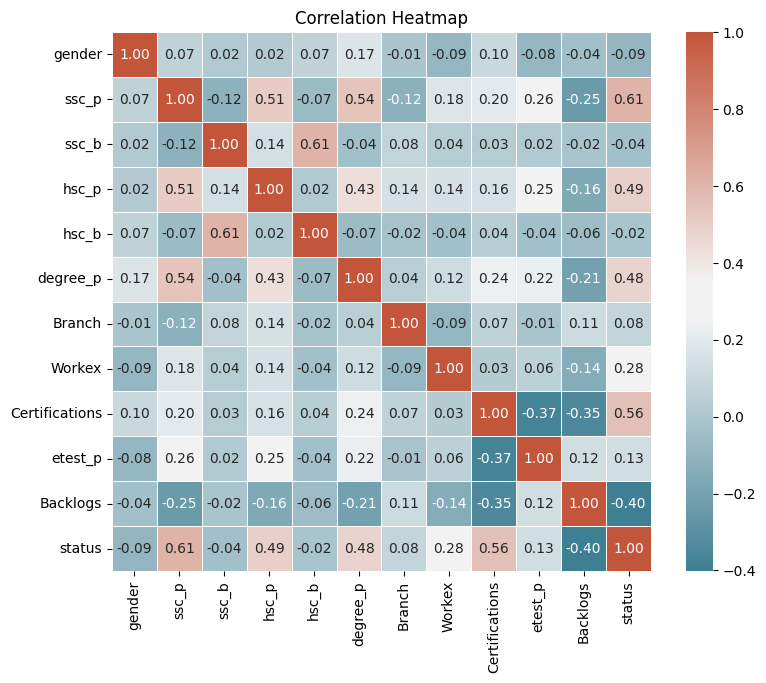

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(9, 7))

# Customize the color palette
cmap = sns.diverging_palette(220, 20,sep=20, n=20, as_cmap=True)

# Create the heatmap
dataplot = sns.heatmap(data.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=.5, square=True)

# Rotate the y-axis labels for better readability
dataplot.set_yticklabels(dataplot.get_yticklabels(), rotation=0)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,Branch,Workex,Certifications,etest_p,Backlogs,status
0,0,67.00,0,91.00,0,58.00,1,0,4,55.0,0,1
1,0,79.33,1,78.33,0,77.48,1,1,1,86.5,0,1
2,0,65.00,1,68.00,1,64.00,2,0,2,75.0,1,1
3,0,56.00,1,52.00,1,52.00,1,0,0,66.0,2,0
4,0,85.80,1,73.60,1,73.30,2,0,3,96.8,0,1


In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [ ]:
print(score1,score2,score3,score4,score5,score6)

0.9767441860465116 0.7674418604651163 0.8372093023255814 0.8837209302325582 0.9534883720930233 0.9302325581395349


In [ ]:
rf_feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})

# Sort features by importance in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_feature_importance_df)

Random Forest Feature Importances:
           Feature  Importance
8   Certifications    0.266946
1            ssc_p    0.232910
3            hsc_p    0.157204
5         degree_p    0.140405
10        Backlogs    0.092964
9          etest_p    0.051260
7           Workex    0.017410
6           Branch    0.013986
0           gender    0.012819
2            ssc_b    0.008219
4            hsc_b    0.005877


Logistic Regression Feature Importances:
           Feature  Importance
4            hsc_b    1.302546
8   Certifications    1.291077
2            ssc_b    1.100795
7           Workex    1.017630
0           gender    0.905682
10        Backlogs    0.505365
1            ssc_p    0.101690
5         degree_p    0.079744
6           Branch    0.073698
3            hsc_p    0.047056
9          etest_p    0.024941


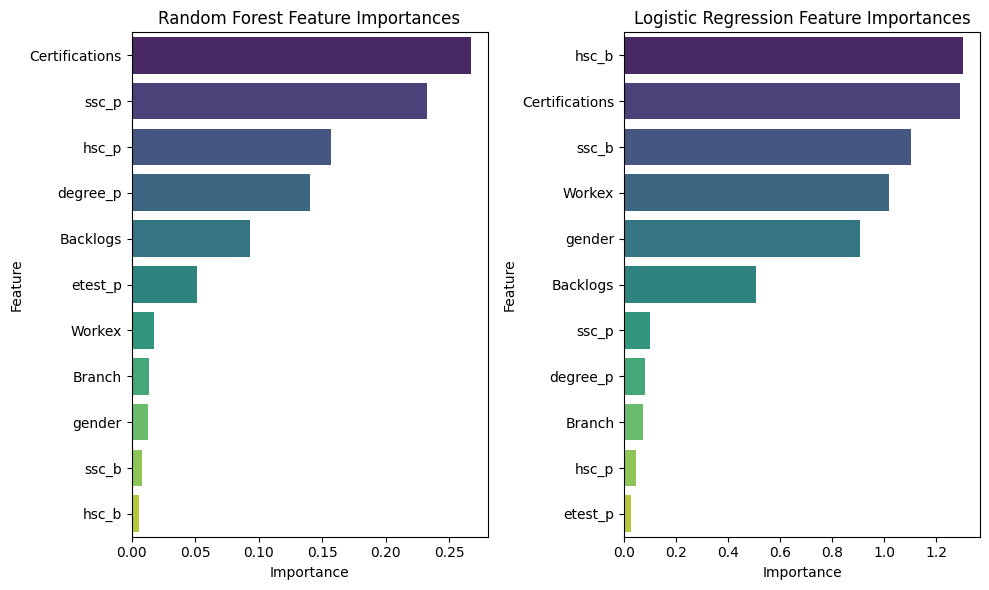

In [ ]:

# Logistic Regression Feature Importances
lr_feature_importances = abs(lr.coef_[0])

# Create a DataFrame to store feature importances
lr_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': lr_feature_importances})

# Sort features by importance in descending order
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Importance', ascending=False)

print("Logistic Regression Feature Importances:")
print(lr_feature_importance_df)

# Plot feature importances for both models
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sb.barplot(x='Importance', y='Feature', data=rf_feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')

plt.subplot(1, 2, 2)
sb.barplot(x='Importance', y='Feature', data=lr_feature_importance_df, palette='viridis')
plt.title('Logistic Regression Feature Importances')

plt.tight_layout()
plt.show()


In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100]})

In [ ]:
final_data

,Models,ACC
0,LR,97.674419
1,SVC,76.744186
2,KNN,83.720930
3,DT,88.372093
4,RF,95.348837
5,GB,93.023256


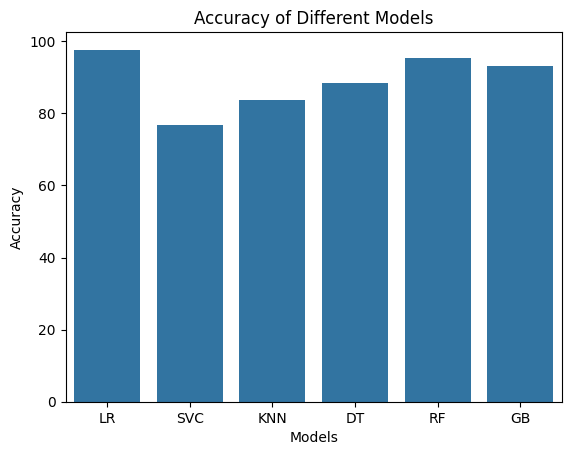

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


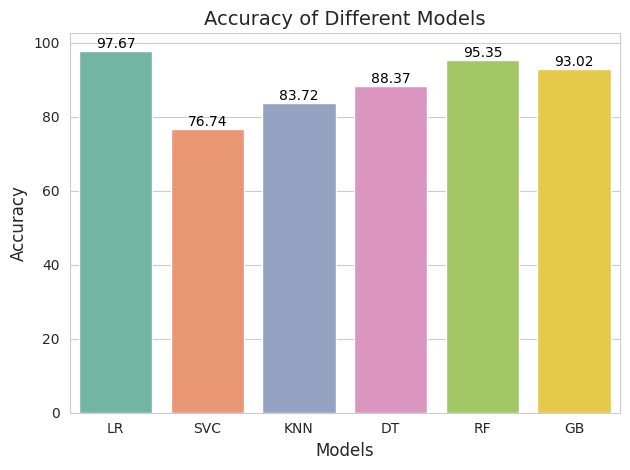

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create the bar plot
ax = sns.barplot(x='Models', y='ACC', data=final_data, palette='Set2')

# Add the exact accuracy value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of Different Models', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':65.0,
    'ssc_b':0,
    'hsc_p':75.0,
    'hsc_b':0,
    'degree_p':65.0,
    'Branch':2,
    'Workex':1,
    'Certifications':5,
    'etest_p':55.0,
     'Backlogs':1,
},index=[0])

In [ ]:
lr= LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [ ]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p[0]==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 1.00


In [ ]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
p=rf.predict(new_data)
prob=rf.predict_proba(new_data)
if p[0]==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.93


In [ ]:

def build_recommendation_system(prediction):
  if prediction == 1:
    print("Congratulations! You are predicted to be placed.")
    print("Here are some tips to increase your chances of getting placed:")
    print("- Network with professionals in your field.")
    print("- Build a strong resume and cover letter.")
    print("- Practice your interviewing skills.")
    print("- Research the companies you are applying to.")
  else:
    print("Unfortunately, you are predicted to not be placed.")
    print("Here are some tips to improve your chances of getting placed:")
    print("- Consider taking additional courses or training to improve your skills.")
    print("- Gain some work experience through internships or part-time jobs.")
    print("- Volunteer your time to gain experience and build your network.")

prediction = rf.predict(new_data)[0]
build_recommendation_system(prediction)


Congratulations! You are predicted to be placed.
Here are some tips to increase your chances of getting placed:
- Network with professionals in your field.
- Build a strong resume and cover letter.
- Practice your interviewing skills.
- Research the companies you are applying to.
